## Preprocessing

In [ ]:
import numpy as np
import pandas as pd

### Data Generation

Range of this attributes are as follows:
1.	Employee_id  : 1-100
2.	Age                             : 22-62
3.	Basic pay                       : 15,600-67000
4.	No.of clients                   : 1-1000
5.	Years of Services               : 0-40
6.	Performance Score               : 0/1

In [1]:
import numpy as np
import pandas as pd

data_employee={ 'employee_id':np.arange(1,101),
                'Age':np.random.randint(25,62,size=100),
                'Basic Pay':np.random.randint(15600,67100,size=100),
                'No of Clients':np.random.randint(1,1000,size=100),
                'Years of Service':np.random.randint(0,41,size=100),
                'Performance Score':np.random.randint(0,2,size=100)
              }
df=pd.DataFrame(data_employee,columns=['employee_id','Age','Basic Pay',
                                       'No of Clients','Years of Service',
                                       'Performance Score'])            
df

,employee_id,Age,Basic Pay,No of Clients,Years of Service,Performance Score
0,1,60,27287,568,9,1
1,2,32,22745,74,32,1
2,3,45,44564,981,10,0
3,4,28,42982,406,16,1
4,5,32,38631,239,30,0
...,...,...,...,...,...,...
95,96,61,39644,427,24,0
96,97,33,42332,638,3,0
97,98,25,51524,772,34,0
98,99,57,60848,550,10,0


In [2]:
df.to_csv('emp.csv',sep=',',index=False)

In [3]:
e=pd.read_csv('emp.csv')

In [4]:
e.head(5)

,employee_id,Age,Basic Pay,No of Clients,Years of Service,Performance Score
0,1,60,27287,568,9,1
1,2,32,22745,74,32,1
2,3,45,44564,981,10,0
3,4,28,42982,406,16,1
4,5,32,38631,239,30,0


In [5]:
e1=pd.read_csv('data_after_missing_values.csv')
e1.head(5)


,employee_id,Age,Basic Pay,No of Clients,Years of Service,Performance Score
0,1,NaN,NaN,606.0,NaN,0
1,2,NaN,NaN,116.0,39.0,0
2,3,32.0,37645.0,611.0,16.0,0
3,4,59.0,17423.0,992.0,16.0,0
4,5,34.0,NaN,56.0,33.0,1


In [14]:
e1.Age

0      NaN
1      NaN
2     32.0
3     59.0
4     34.0
      ... 
95    38.0
96    38.0
97    60.0
98     NaN
99    44.0
Name: Age, Length: 100, dtype: float64

In [15]:
e1['Age']

0      NaN
1      NaN
2     32.0
3     59.0
4     34.0
      ... 
95    38.0
96    38.0
97    60.0
98     NaN
99    44.0
Name: Age, Length: 100, dtype: float64

##  Data Imputation or Missing Values

In [6]:
e1.isnull()

,employee_id,Age,Basic Pay,No of Clients,Years of Service,Performance Score
0,False,True,True,False,True,False
1,False,True,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
95,False,False,False,False,False,False
96,False,False,False,False,False,False
97,False,False,False,False,False,False
98,False,True,True,True,False,False


In [8]:
e1.isna().sum()

employee_id          0
Age                  9
Basic Pay            6
No of Clients        2
Years of Service     7
Performance Score    0
dtype: int64

In [9]:
e1.isnull().sum()

employee_id          0
Age                  9
Basic Pay            6
No of Clients        2
Years of Service     7
Performance Score    0
dtype: int64

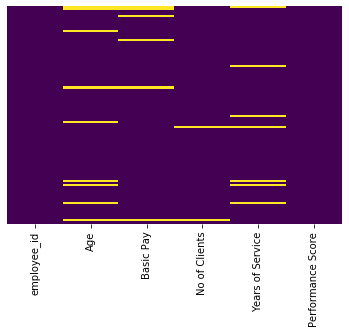

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(e1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
e1.describe()

,employee_id,Age,Basic Pay,No of Clients,Years of Service,Performance Score
count,100.000000,91.000000,94.000000,98.000000,93.000000,100.00
mean,50.500000,43.197802,41734.329787,487.326531,18.419355,0.45
std,29.011492,11.028468,14004.844553,281.520129,11.069271,0.50
min,1.000000,25.000000,16584.000000,1.000000,0.000000,0.00
25%,25.750000,33.500000,30486.000000,272.250000,11.000000,0.00
50%,50.500000,44.000000,42204.500000,491.000000,16.000000,0.00
75%,75.250000,52.500000,52856.500000,717.750000,25.000000,1.00
max,100.000000,62.000000,66259.000000,992.000000,40.000000,1.00


In [13]:
e1.count()

employee_id          100
Age                   91
Basic Pay             94
No of Clients         98
Years of Service      93
Performance Score    100
dtype: int64

In [16]:
e1['Age'].fillna(e['Age'].mean(),inplace=True)

e1['Basic Pay'].fillna(e['Basic Pay'].mean(),inplace=True)

e1['No of Clients'].fillna(e['No of Clients'].mean(),inplace=True)

e1['Years of Service'].fillna(e['Years of Service'].mean(),inplace=True)

print(e1.head(5))

   employee_id    Age  Basic Pay  No of Clients  Years of Service  \
0            1  41.01   40428.29          606.0             21.22   
1            2  41.01   40428.29          116.0             39.00   
2            3  32.00   37645.00          611.0             16.00   
3            4  59.00   17423.00          992.0             16.00   
4            5  34.00   40428.29           56.0             33.00   

   Performance Score  
0                  0  
1                  0  
2                  0  
3                  0  
4                  1  


In [17]:
e1.to_csv('empmean.csv',sep=',',index=False)

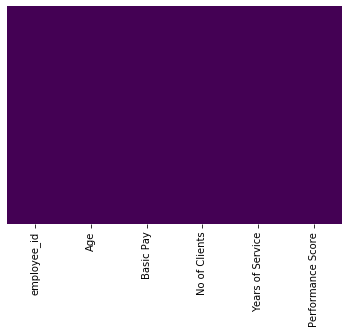

In [20]:
sns.heatmap(e1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
e2=pd.read_csv('empmean.csv')
e2.head(5)

,employee_id,Age,Basic Pay,No of Clients,Years of Service,Performance Score
0,1,41.01,40428.29,606.0,21.22,0
1,2,41.01,40428.29,116.0,39.00,0
2,3,32.00,37645.00,611.0,16.00,0
3,4,59.00,17423.00,992.0,16.00,0
4,5,34.00,40428.29,56.0,33.00,1


### Data Encoding

In [22]:
# using pandas
import pandas as pd

e=pd.read_csv('scaling test1.csv')

print(e.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         5 non-null      int64 
 1   Age        5 non-null      int64 
 2   Workclass  5 non-null      object
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes
None


In [23]:
print(e.dtypes)

ID            int64
Age           int64
Workclass    object
dtype: object


In [25]:
e1 = e.copy()

print(e1)
cleanup_wc = {"Workclass": {"Private": 1, 
                            "State-gov": 2,
                            'Central-gov':3,
                            'Others':4}}
e1.replace(cleanup_wc, inplace=True)

print(e1)

     ID  Age    Workclass
0  1001   25      Private
1  1002   38      Private
2  1003   28    State-gov
3  1004   36  Central-gov
4  1005   20       Others
     ID  Age  Workclass
0  1001   25          1
1  1002   38          1
2  1003   28          2
3  1004   36          3
4  1005   20          4


In [ ]:
e1.to_csv('encod.csv',sep=',',index=False)

In [26]:
# using SK learn 
import pandas as pd

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

e=pd.read_csv('scaling test1.csv')
print(e)

e1 = e.copy()
e1["Wc"] = le.fit_transform(e["Workclass"])
print(e1[["Workclass", "Wc"]].head())


     ID  Age    Workclass
0  1001   25      Private
1  1002   38      Private
2  1003   28    State-gov
3  1004   36  Central-gov
4  1005   20       Others
     Workclass  Wc
0      Private   2
1      Private   2
2    State-gov   3
3  Central-gov   0
4       Others   1


In [27]:
e1.to_csv('encod_le.csv',sep=',',index=False)

In [29]:
# one hot encoding
import pandas as pd

df = pd.DataFrame({'country': ['russia', 'germany', 'australia','korea','germany']})
df

,country
0,russia
1,germany
2,australia
3,korea
4,germany


In [30]:
pd.get_dummies(df,prefix=['country'])

,country_australia,country_germany,country_korea,country_russia
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


### Data Normalization/Scaling/Transformation*

In [31]:
import pandas as pd

X_train=pd.read_csv('X_train.csv')

Y_train=pd.read_csv('Y_train.csv')

X_test=pd.read_csv('X_test.csv')

Y_test=pd.read_csv('Y_test.csv')

print (X_train.head())

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']],Y_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']])))

0.6145833333333334


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
#sklearn provides a tool MinMaxScaler that will scale down all the features between 0 and 1. 
Mathematical formula for MinMaxScaler is.

from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_minmax,Y_train)

print(accuracy_score(Y_test,knn.predict(X_test_minmax)))

print('standardized')

0.75
standardized


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


In [ ]:
from sklearn.preprocessing import scale

X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

# Fitting logistic regression on our standardized data set

from sklearn.linear_model import LogisticRegression

log=LogisticRegression(penalty='l2',C=.01)

log.fit(X_train_scale,Y_train)
# Checking the model's accuracy

accuracy_score(Y_test,log.predict(X_test_scale))

###  Dimensionality reduction

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 
            'petal width']
# Separating out the features
x = df.loc[:, features].values
x

In [ ]:
# Separating out the target
y = df.loc[:,['target']].values
print(y)

In [ ]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

In [ ]:
#The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print(principalComponents)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns = 
                           ['principal component 1',
                            'principal component 2',
                            'principal component 3'])
print(principalDf)

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

In [ ]:
pca.explained_variance_ratio_